#Objective
This project shows how to perform a mall customers segmentation using Machine Learning algorithms. This is the unsupervised clustering problem and three popular algorithms will be presented and compared: KMeans, Hierarchical and DBSCAN.


In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving Customer.csv to Customer.csv


##Import libraries

Let's first import the required libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans



In [ ]:
df = pd.read_csv('Customer.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.value_counts()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
1           Male    19   15                  39                        1
138         Male    32   73                  73                        1
128         Male    40   71                  95                        1
129         Male    59   71                  11                        1
130         Male    38   71                  75                        1
                                                                      ..
70          Female  32   48                  47                        1
71          Male    70   49                  55                        1
72          Female  47   49                  42                        1
73          Female  60   50                  49                        1
200         Male    30   137                 83                        1
Name: count, Length: 200, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


##data cleaning:
convert the 'Gender' column, which its data was object, to integer

In [ ]:
def con_gender (a):
  if a=='Male':
    return 0
  else:
    return 1

In [ ]:
df['Gender']=df['Gender'].apply(con_gender)
df['Gender']

0      0
1      0
2      1
3      1
4      1
      ..
195    1
196    1
197    0
198    0
199    0
Name: Gender, Length: 200, dtype: int64

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


### k-Means on a randomly generated dataset

Use numpy's random.seed() function, where the seed will be set to 0.

In [ ]:
np.random.seed(0)

Next we will be making random clusters of points by using the make_blobs class.
The make_blobs class can take in many inputs, but we will be using these specific ones.

Input
   

*   n_samples: The total number of points equally divided among clusters.
                       Value will be: 200
*   centers: The number of centers to generate, or the fixed center locations.
        Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]]

*  cluster_std: The standard deviation of the clusters.
        Value will be: 0.9
    

Output


*  X: Array of shape [n_samples, n_features]. (Feature Matrix)
*  y: Array of shape [n_samples]. (Response Vector) The integer labels for cluster membership of each sample.









X: Array of shape [n_samples, n_features]. (Feature Matrix)

y: Array of shape [n_samples]. (Response Vector)
    The integer labels for cluster membership of each sample.



In [ ]:
X, y = make_blobs(n_samples=200, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)
print(X)
print(y)

Display the scatter plot of the randomly generated data.

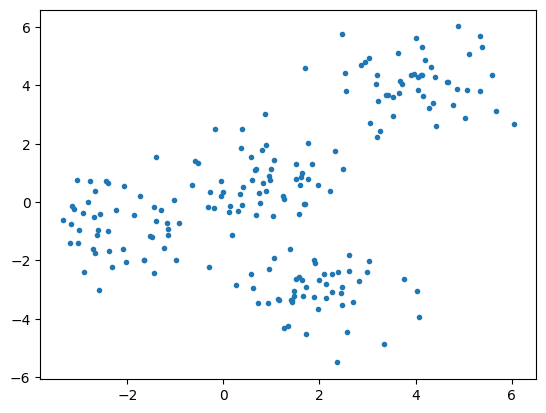

In [ ]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

###Setting up K-Means

Now that we have our random data, let's set up our K-Means Clustering.





The KMeans class has many parameters that can be used, but we will be using these three:


*  init: Initialization method of the centroids.
      Value will be: "k-means++"
      
      k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.


*  n_clusters:The number of clusters to form as well as the number of centroids to generate.
        Value will be: 4 (since we have 4 centers)
*  n_init: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
        Value will be: 12
   

Initialize KMeans with these parameters, where the output parameter is called k_means.


In [ ]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_means

KMeans(n_clusters=4, n_init=12)

Now let's fit the KMeans model with the feature matrix we created above, X .

In [ ]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

Now let's grab the labels for each point in the model using KMeans' .labels_ attribute and save it as k_means_labels .

In [ ]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 1, 0, 3, 3, 0, 0, 1, 1, 0, 2, 1, 2, 3, 2, 1, 0, 1, 3, 1, 2, 3,
       1, 2, 2, 3, 3, 3, 0, 0, 3, 1, 2, 3, 2, 1, 2, 1, 1, 0, 0, 3, 0, 2,
       2, 2, 1, 2, 0, 3, 2, 0, 1, 0, 2, 2, 1, 1, 0, 2, 2, 1, 2, 3, 1, 0,
       3, 2, 0, 1, 1, 2, 2, 1, 2, 0, 3, 3, 0, 0, 1, 3, 3, 1, 1, 1, 0, 3,
       1, 0, 1, 1, 2, 3, 0, 1, 0, 2, 0, 3, 0, 0, 3, 0, 1, 3, 1, 2, 0, 1,
       3, 1, 1, 1, 2, 1, 3, 0, 1, 2, 2, 3, 2, 1, 3, 3, 2, 0, 3, 3, 3, 0,
       3, 2, 1, 0, 2, 3, 0, 1, 3, 3, 3, 1, 2, 1, 0, 3, 3, 2, 3, 0, 2, 1,
       0, 0, 2, 1, 2, 3, 0, 3, 0, 2, 2, 1, 0, 1, 3, 3, 0, 2, 1, 2, 0, 1,
       3, 0, 3, 1, 1, 2, 3, 2, 3, 1, 2, 1, 2, 0, 0, 0, 0, 2, 1, 1, 0, 2,
       0, 2], dtype=int32)

We will also get the coordinates of the cluster centers using KMeans' .cluster_centers_ and save it as k_means_cluster_centers .

In [ ]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 4.01512555,  4.09252888],
       [ 0.77808946,  0.7399289 ],
       [ 1.95182286, -3.06123778],
       [-2.15692915, -0.89143469]])

###Creating the Visual Plot
So now that we have the random data generated and the KMeans model initialized, let's plot them and see what it looks like!

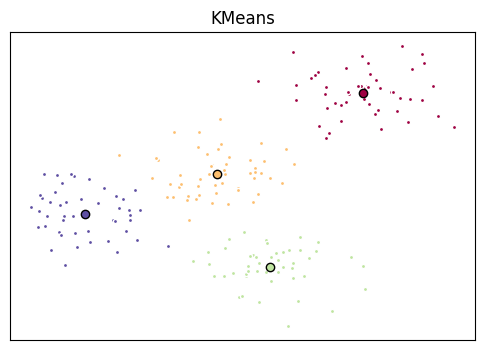

In [ ]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)

    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]

    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')

    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


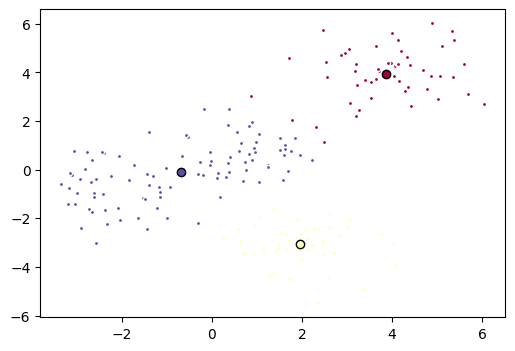

In [ ]:
k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()


###Hierarchical Clustering

In [ ]:
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering

In [ ]:
X1, y1 = make_blobs(n_samples=200, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

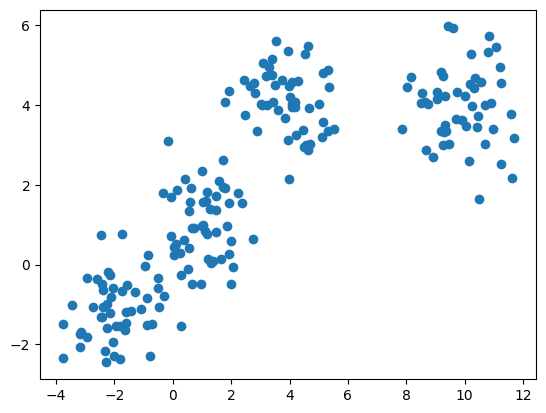

In [ ]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o')

###Agglomerative Clustering

The Agglomerative Clustering class will require two inputs:


    

*   n_clusters: The number of clusters to form as well as the number of
centroids to generate.
        Value will be: 4

*   linkage: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
        Value will be: 'complete'
        Note: It is recommended you try everything with 'average' as well


Save the result to a variable called agglom .


In [ ]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'complete')

In [ ]:
agglom.fit(X1,y1)

AgglomerativeClustering(linkage='complete', n_clusters=4)

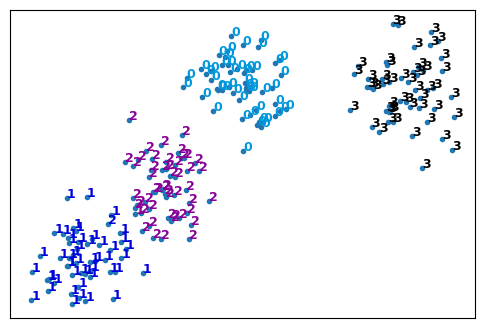

In [ ]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})

# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

In [ ]:
dist_matrix = distance_matrix(X1,X1)
print(dist_matrix)

[[0.         0.14003831 0.85941543 ... 0.75523172 0.40475811 0.23489223]
 [0.14003831 0.         0.72697692 ... 0.62824951 0.26816499 0.32873257]
 [0.85941543 0.72697692 0.         ... 0.12736383 0.53524701 1.04533498]
 ...
 [0.75523172 0.62824951 0.12736383 ... 0.         0.47010419 0.95333077]
 [0.40475811 0.26816499 0.53524701 ... 0.47010419 0.         0.53313822]
 [0.23489223 0.32873257 1.04533498 ... 0.95333077 0.53313822 0.        ]]


In [ ]:
Z = hierarchy.linkage(dist_matrix, 'complete')

<ipython-input-217-3814b774a052>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


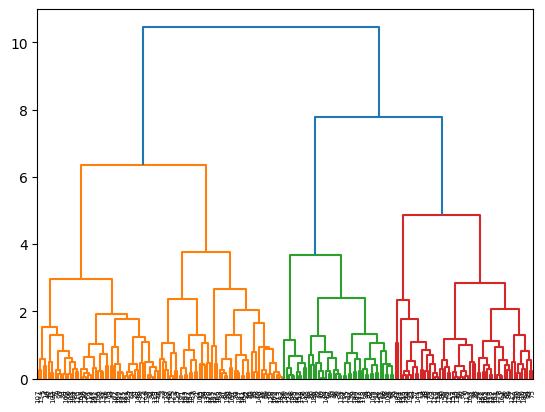

In [ ]:
dendro = hierarchy.dendrogram(Z)

### Test
if
linkage: Value will be: 'complete'

In [ ]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

In [ ]:
agglom.fit(X1,y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

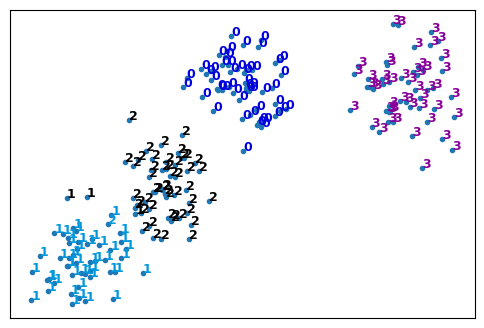

In [ ]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})

# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

In [ ]:
dist_matrix = distance_matrix(X1,X1)
print(dist_matrix)

[[0.         0.14003831 0.85941543 ... 0.75523172 0.40475811 0.23489223]
 [0.14003831 0.         0.72697692 ... 0.62824951 0.26816499 0.32873257]
 [0.85941543 0.72697692 0.         ... 0.12736383 0.53524701 1.04533498]
 ...
 [0.75523172 0.62824951 0.12736383 ... 0.         0.47010419 0.95333077]
 [0.40475811 0.26816499 0.53524701 ... 0.47010419 0.         0.53313822]
 [0.23489223 0.32873257 1.04533498 ... 0.95333077 0.53313822 0.        ]]


In [ ]:
Z = hierarchy.linkage(dist_matrix, 'average')

<ipython-input-191-d72c57614045>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'average')


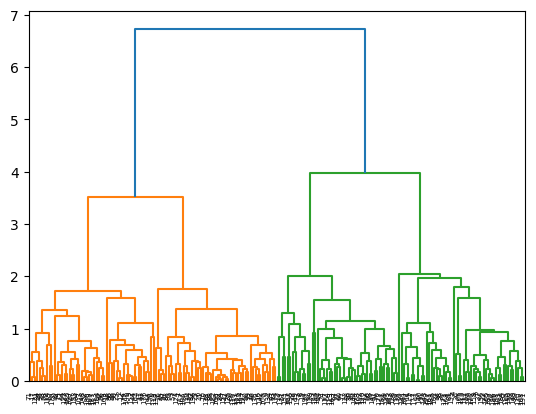

In [ ]:
dendro = hierarchy.dendrogram(Z)

###DBSCAN

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

###Data generation

The function below will generate the data points and requires these inputs:


  centroidLocation: Coordinates of the centroids that will generate the random data.

      Example: input: [[4,3], [2,-1], [-1,4]]

  numSamples: The number of data points we want generated, split over the number of centroids (# of centroids defined in centroidLocation)

      
  clusterDeviation: The standard deviation of the clusters. The larger the number, the further the spacing of the data points within the clusters.

In [ ]:
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(n_samples=200, centers=centroidLocation,
                                cluster_std=clusterDeviation)

    # Standardize features by removing the mean and scaling to unit variance
    X = StandardScaler().fit_transform(X)
    return X, y

Use createDataPoints with the 3 inputs and store the output into variables X and y.

In [ ]:
X, y = createDataPoints([[4,3], [2,-1], [-1,4]] , 200, 0.5)
print(X)
print(y)

##Modeling

DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. This technique is one of the most common clustering algorithms which works based on density of object. The whole idea is that if a particular point belongs to a cluster, it should be near to lots of other points in that cluster.

It works based on two parameters: Epsilon and Minimum Points:

Epsilon: determine a specified radius that if includes enough number of points within, we call it dense area
minimumSamples: determine the minimum number of data points we want in a neighborhood to define a cluster.


In [ ]:
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels
np.histogram(labels)

(array([ 2,  0,  0, 66,  0,  0, 67,  0,  0, 65]),
 array([-1. , -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  2. ]))

###Distinguish outliers:
Let's Replace all elements with 'True' in core_samples_mask that are in the cluster, 'False' if the points are outliers.

In [ ]:
# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [ ]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2}

###Data visualization

In [ ]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

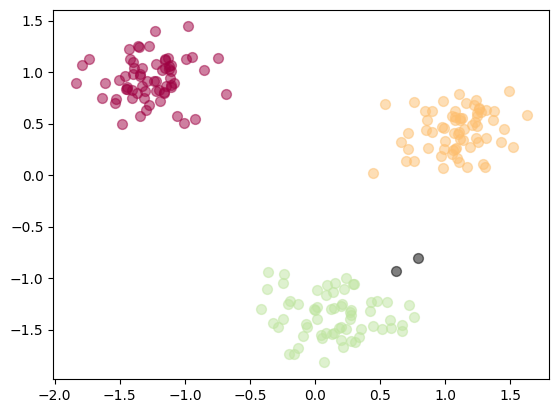

In [ ]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

###DBSCAN Vs K-Means

<ipython-input-232-fd4bc02b9c76>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[my_members, 0], X[my_members, 1],  c=col, marker=u'o', alpha=0.5)


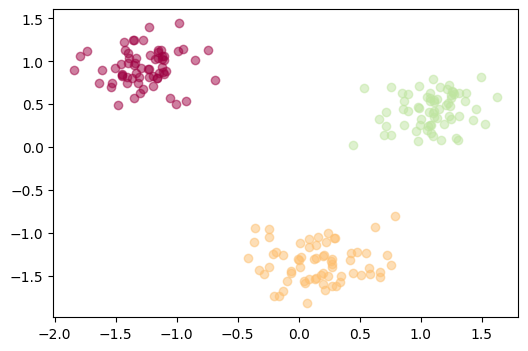

In [ ]:
from sklearn.cluster import KMeans
k = 3
k_means3 = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(k), colors):
    my_members = (k_means3.labels_ == k)
    plt.scatter(X[my_members, 0], X[my_members, 1],  c=col, marker=u'o', alpha=0.5)
plt.show()